In [1]:
import pandas as pd
import numpy as np
from ranking_ut import *
data = pd.read_csv('Studencka_up.csv')
data_dict = data.to_dict('list')
keys = list(data_dict.keys())
animals_dict = return_animals_dict()


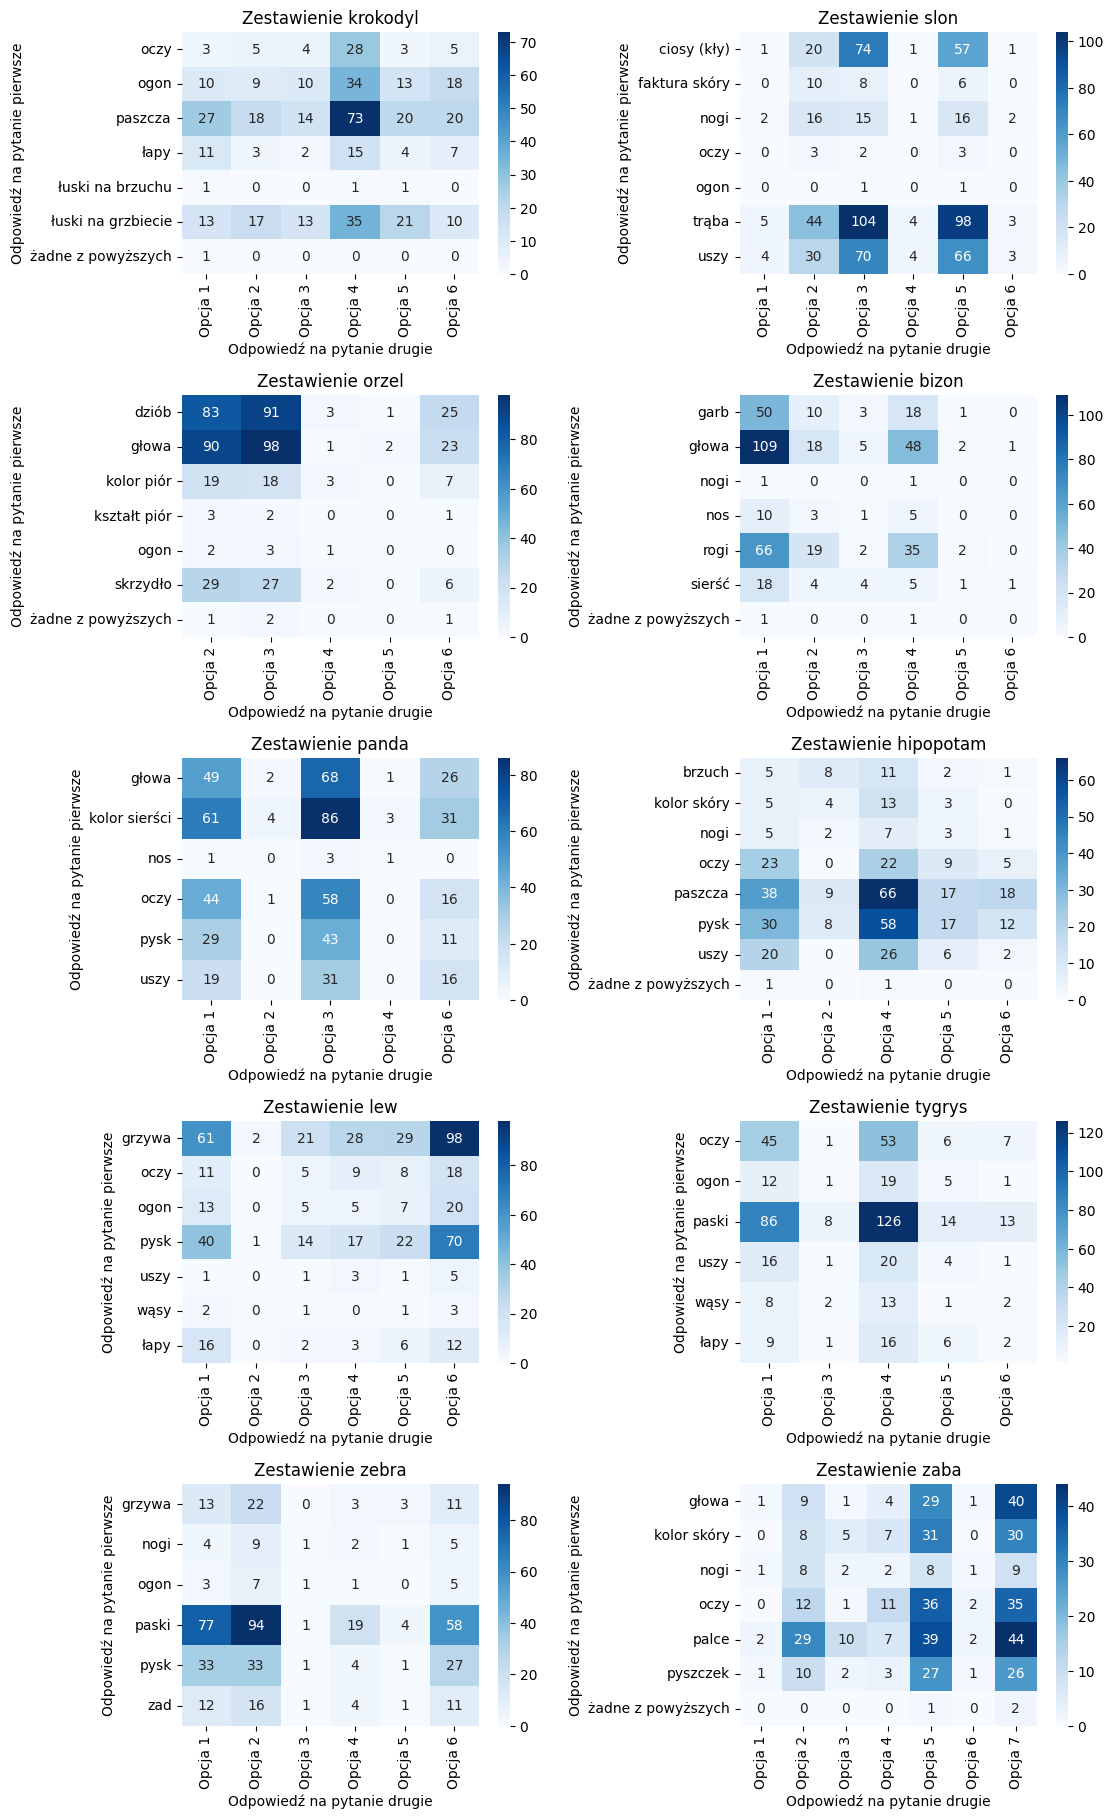

In [5]:
from scipy.stats import chi2_contingency
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

obserwation_list = []
data_dict = data.to_dict('list')
keys = list(data_dict.keys())
dict_column = {}
one_list = []
two_list = []

for i, an in zip(np.arange(1,21,2), range(10)):
    dict_column = {}
    one_list = []
    two_list = []
    for one_str, two_str in zip(data_dict[keys[i]], data_dict[keys[i+1]]):
        if str(one_str) != "nan" and str(two_str) != "nan":    
            for one in one_str.split(", "):
                for two in two_str.split(", "):
                    one_list.append(one)
                    for key, value in animals_dict[animals_name[an]].items():
                        if two[-1] in value:
                            two += "\n"
                            two += str(key)
                            break
                    two_list.append(two)

    dict_column[keys[i]] = one_list
    dict_column[keys[i+1]] = two_list
    df = pd.DataFrame(dict_column)
    columns =  np.unique(two_list)

    for key, dic_a in animals_dict.items():
        for num in dic_a:
            columns =  [c + "_" + str(dic_a) if num in c else c for c in columns  ]
    observations = pd.crosstab(index=df[keys[i]], columns=df[keys[i+1]],margins=False)
    obserwation_list.append(observations)
   
fig, axs = plt.subplots(5, 2, figsize=(13, 24), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .6, wspace=.6)
axs = axs.ravel()
for i in range(10):
    sns.heatmap(obserwation_list[i], annot=True, fmt='.0f',cmap='Blues', ax=axs[i])
    axs[i].set_title('Zestawienie '+animals_name[i] )
    axs[i].set_ylabel('Odpowiedź na pytanie pierwsze')
    axs[i].set_xlabel('Odpowiedź na pytanie drugie')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0)
plt.show()


